In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import shutil
from keras.models import Sequential
from keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from keras import backend as K
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
path_train="/kaggle/input/train-test-valid/train"
path_valid="/kaggle/input/train-test-valid/valid"
path_test="/kaggle/input/train-test-valid/test"

Number of images of Diseased Fruit: 40 || Number of images of Cercospora leaf spot: 210 || Number of images of Powdery Mildew: 28 || Number of images of Healthy Fruit: 93 || Number of images of Healthy: 188 || Total number of images we have 559


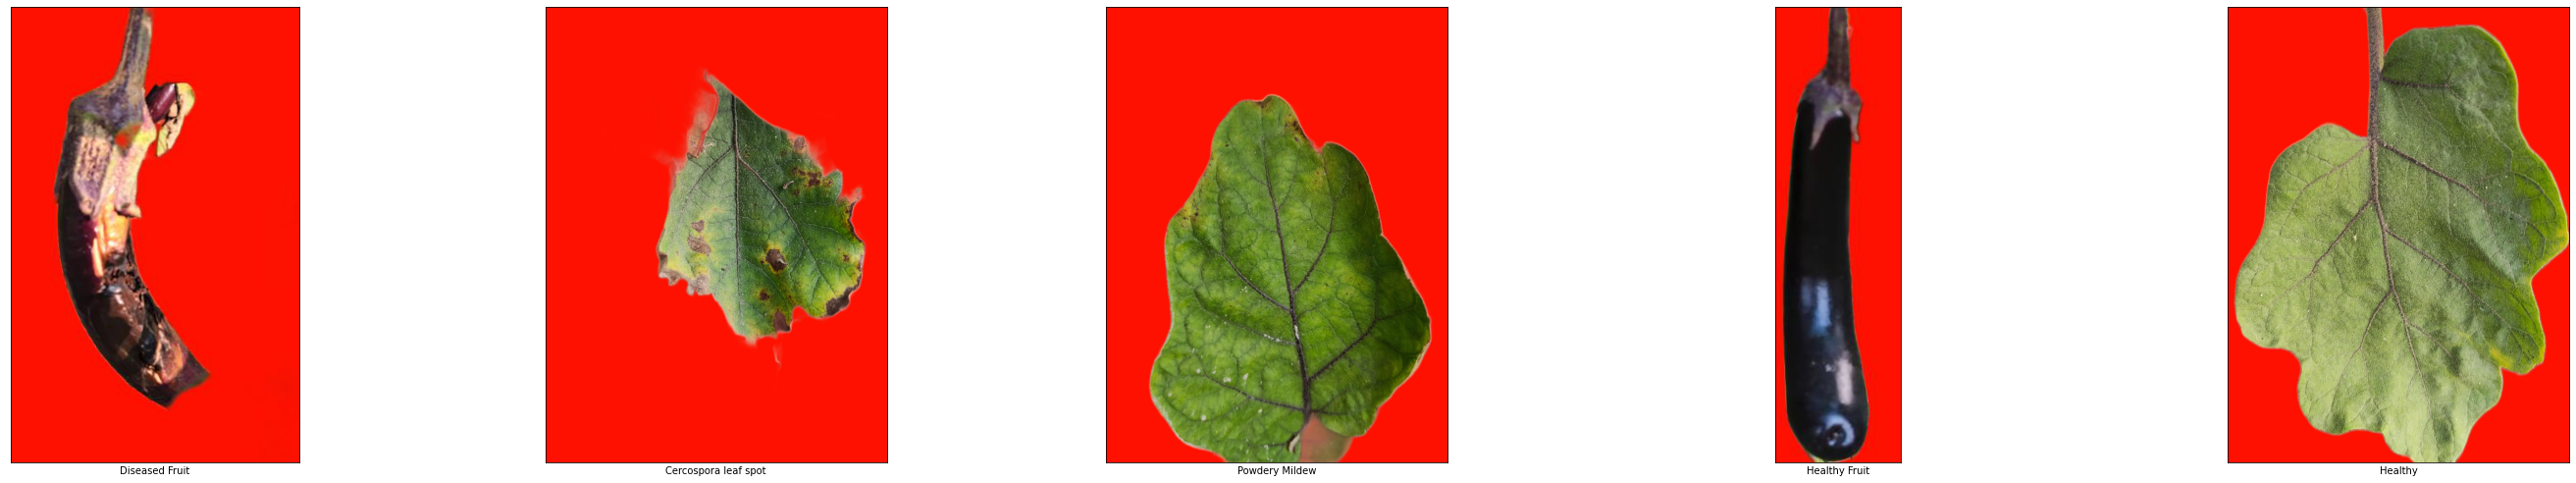

In [10]:
path=path_train
plt.figure(figsize=(70,70))
count=0
plant_names=[]
total_images=0
for i in os.listdir(path):
  count+=1
  plant_names.append(i)
  plt.subplot(7,7,count)

  images_path=os.listdir(path+"/"+i)
  print("Number of images of "+i+":",len(images_path),"||",end=" ")
  total_images+=len(images_path)

  image_show=plt.imread(path+"/"+i+"/"+images_path[0])
  
  plt.imshow(image_show)
  plt.xlabel(i)
  
  plt.xticks([])
  plt.yticks([])


print("Total number of images we have",total_images)  

In [15]:
print(plant_names)
print(len(plant_names))
classes=len(plant_names)

['Diseased Fruit', 'Cercospora leaf spot', 'Powdery Mildew', 'Healthy Fruit', 'Healthy']
5


In [16]:
#Image augmentation
train_datagen= ImageDataGenerator(shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest',
                                  width_shift_range=0.2,
                                  height_shift_range=0.2)

val_datagen=ImageDataGenerator()

train= train_datagen.flow_from_directory(directory=path_train,
                                         batch_size=32,
                                         target_size=(224,224),
                                         color_mode='rgb',
                                         class_mode='categorical',
                                         seed=42)

valid=val_datagen.flow_from_directory(directory=path_valid,
                                      batch_size=32,
                                      target_size=(224,224),
                                      color_mode='rgb',
                                      class_mode='categorical')

Found 559 images belonging to 5 classes.
Found 68 images belonging to 5 classes.


In [ ]:
# Assuming you have a separate test dataset
test_datagen = ImageDataGenerator()
test = test_datagen.flow_from_directory(
    directory=path_test,
    batch_size=32,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

# Get the class labels from the generator
class_labels = list(test.class_indices.keys())

In [17]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau


In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from keras import backend as K

model = Sequential()
inputShape = (224, 224, 3)  # Adjust the input shape to match your image size
chanDim = -1

if K.image_data_format() == "channels_first":
    inputShape = (3, 224, 224)
    chanDim = 1

model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(classes))  # Replace n_classes with your number of classes
model.add(Activation("softmax"))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
activation_7 (Activation)    (None, 74, 74, 64)       

In [20]:
!mkdir cnn

In [21]:
es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=7, mode='auto')
mc = ModelCheckpoint(filepath='/kaggle/working/cnn', monitor='val_accuracy', verbose=1, save_best_only=True)
lr = ReduceLROnPlateau(monitor='val_accuracy', verbose=1, patience=5, min_lr=0.001)

In [23]:
model.compile(optimizer='Adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])


history = model.fit(
    train,
    steps_per_epoch=10,
    epochs=30,
    validation_data=valid
)

Epoch 1/30
10/10 [==============================] - 96s 9s/step - loss: 3.2615 - accuracy: 0.3730 - val_loss: 57.1537 - val_accuracy: 0.3382
Epoch 2/30
10/10 [==============================] - 71s 7s/step - loss: 1.8326 - accuracy: 0.5498 - val_loss: 41.1743 - val_accuracy: 0.0441
Epoch 3/30
10/10 [==============================] - 74s 7s/step - loss: 1.3069 - accuracy: 0.6110 - val_loss: 39.8919 - val_accuracy: 0.0441
Epoch 4/30
10/10 [==============================] - 70s 7s/step - loss: 1.1564 - accuracy: 0.6591 - val_loss: 11.7971 - val_accuracy: 0.3382
Epoch 5/30
10/10 [==============================] - 71s 7s/step - loss: 1.0860 - accuracy: 0.6712 - val_loss: 8.4579 - val_accuracy: 0.3382
Epoch 6/30
10/10 [==============================] - 70s 7s/step - loss: 0.9396 - accuracy: 0.6129 - val_loss: 14.3341 - val_accuracy: 0.3529
Epoch 7/30
10/10 [==============================] - 74s 7s/step - loss: 1.0475 - accuracy: 0.6646 - val_loss: 6.1920 - val_accuracy: 0.1324
Epoch 8/30
10/1

In [28]:
scores = model.evaluate(test)

3/3 [==============================] - 11s 3s/step - loss: 1.1300 - accuracy: 0.7200


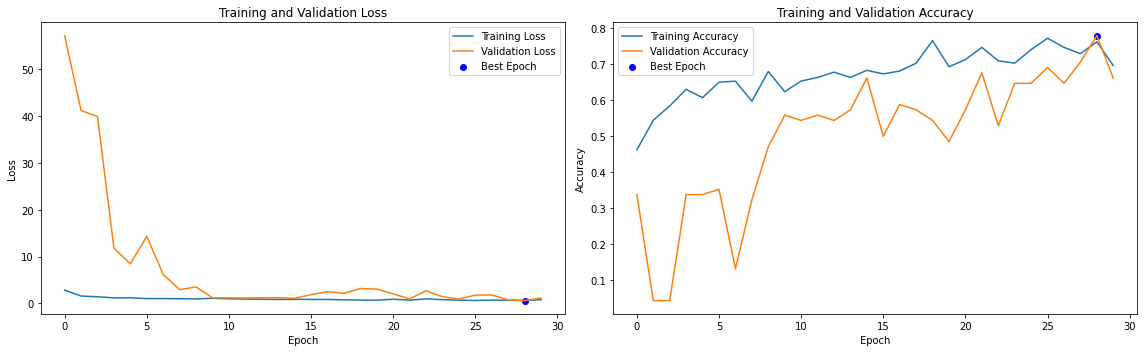

In [36]:
import matplotlib.pyplot as plt
import numpy as np
# Get the training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the training and validation accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Find the index of the best epoch based on validation loss
best_epoch = np.argmin(val_loss)

# Plot the training and validation loss curves side by side
plt.figure(figsize=(16, 5))

# Plot the training loss curve
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.scatter(best_epoch, val_loss[best_epoch], color='blue', label='Best Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.scatter(best_epoch, val_acc[best_epoch], color='blue', label='Best Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


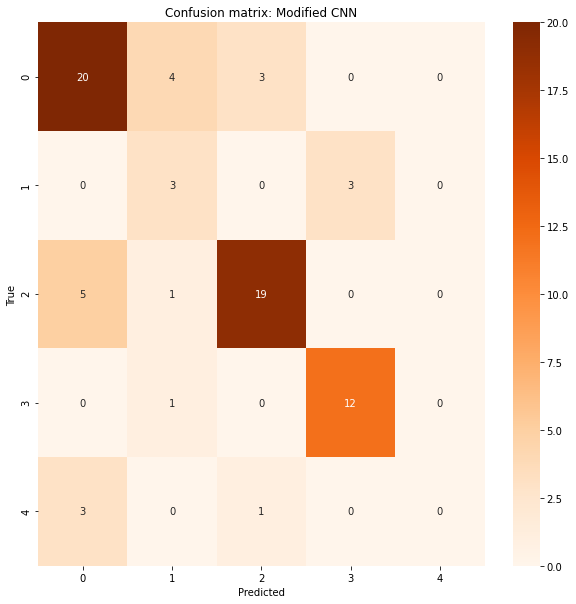

                      precision    recall  f1-score   support

Cercospora leaf spot       0.71      0.74      0.73        27
      Diseased Fruit       0.33      0.50      0.40         6
             Healthy       0.83      0.76      0.79        25
       Healthy Fruit       0.80      0.92      0.86        13
      Powdery Mildew       0.00      0.00      0.00         4

            accuracy                           0.72        75
           macro avg       0.53      0.58      0.56        75
        weighted avg       0.70      0.72      0.71        75



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# saved_model_path = '/content/drive/MyDrive/unknow folder/CNN.h5'
# model = load_model(saved_model_path)
model=model
y_pred = model.predict(test)
y_true = test.classes

# Convert predictions to class indices
y_pred = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix: Modified CNN')
plt.show()

# Generate the classification report with class names
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)